# Module 1: Introduction to Neural Nets 

The aim of this module is to introduce you to designing simple neural networks. You've already seen how to load data in PyTorch and a sample script of the overall workflow. In this notebook, you'll implement your own neural network and report on it's performance. 

## Gathering data 

We'll use the dataloading module we developed earlier. 

In [3]:
import sys, os 
import pickle 
import torch 
import torch.utils.data as data 
import glob
from PIL import Image
import numpy as np


def unpickle(fname):
    with open(fname, 'rb') as f:
        Dict = pickle.load(f, encoding='bytes')
    return Dict

def load_data(batch):
    print ("Loading batch:{}".format(batch))
    return unpickle(batch)


class CIFARLoader(data.Dataset):
    """
    CIFAR-10 Loader: Loads the CIFAR-10 data according to an index value 
    and returns the data and the labels. 
    
    args:
    root: Root of the data directory.
    
    Optional args:
    transforms: The transforms you wish to apply to the data.
    target_transforms: The transforms you wish to apply to the labels.
    
    """
    def __init__(self, root, train=True, transform=None, target_transform=None):
        self.root = root 
        self.transform = transform 
        self.target_transform = target_transform
        self.train = train
        patt = os.path.join(self.root, 'data_batch_*') # create the pattern we want to search for.
        self.batches = sorted(glob.glob(patt))
        self.train_data = []
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        if self.train:
            for batch in self.batches:
                entry = {} 
                entry = load_data(batch)
                self.train_data.append(entry[b'data'])
                self.train_labels += entry[b'labels']
        else:
            entry = load_data(os.path.join(self.root, 'test_batch'))
            self.test_data.append(entry[b'data'])
            self.test_labels += entry[b'labels']
        #############################################
        # We need to "concatenate" all the different #
        # training samples into one big array. For   #
        # doing that we're going to use a numpy      # 
        # function called "concatenate".             # 
        ##############################################
        if self.train:
            self.train_data = np.concatenate(self.train_data) 
            self.train_data = self.train_data.reshape((50000, 3, 32,32))
            self.train_data = self.train_data.transpose((0,2,3,1)) # pay attention to this step!
        else: 
            self.test_data = np.concatenate(self.test_data)
            self.test_data = self.test_data.reshape((10000, 3,32,32))
            self.test_data = self.test_data.transpose((0,2,3,1))
        
        
    
    def __getitem__(self, index):
        
        if self.train:
            image = self.train_data[index]
            label = self.train_labels[index]
        else:
            image = self.test_data[index]
            label = self.test_labels[index]
        
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            label = self.target_transform(label)
#         print(image.size())
        return image, label
    
    def __len__(self):
        if self.train:
            return len(self.train_data)
        else:
            return len(self.test_data)




Given the dataset, let's test our dataset by seeing some of the images and their corresponding labels. PyTorch provides us with a neat little function called make_grid which plots "x" number of images together in a grid. 

Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_1
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_2
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_3
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_4
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_5


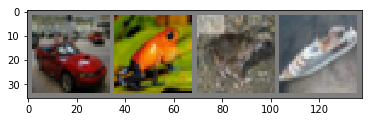

'car frog frog ship'

In [4]:
import torchvision.transforms as transforms
import torch.utils.data as data
import numpy as np 
import matplotlib.pyplot as plt
import torchvision

def imshow(torch_tensor):
    torch_tensor = torch_tensor/2 + 0.5
    npimg = torch_tensor.numpy()
    plt.imshow(npimg.transpose(1,2,0))
    plt.show()

    

tfs  = transforms.Compose([transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

root='/home/akulshr/cifar-10-batches-py/'

cifar_train = CIFARLoader(root, train=True, transform=tfs) # create a "CIFARLoader instance".
cifar_loader = data.DataLoader(cifar_train, batch_size=4, shuffle=True, num_workers=2)

# all possible classes in the CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

data_iter = iter(cifar_loader)
data,label = data_iter.next()

#visualize data.
imshow(torchvision.utils.make_grid(data))

# print the labels
' '.join(classes[label[j]] for j in range(4))


### Checking for GPU

In [6]:
# checking for GPU can simply be done by adding the following code 
gpu_avail = torch.cuda.is_available()
print(gpu_avail)

True


## Creating a Neural Network 

Now that we're through with the boring part, let's move on to the fun stuff! In the code stub being provided you can write your own network definition and then print it. We've not covered Convolutional Layers yet, so the fun will be limited to just using Linear Layers. When using linear layers keep in mind that the input features are `3*32*32`.  When writing out the layers it is important to think in terms of matrix multiplication. So if your input features are of dimension `4x3x32x32` then your input features must be the same dimensions. I'll define some terms so that you can use them while designing the net: 


- N: The batch size --> This determines how many images are pushed through the network during an iteration. 
- C: The number of channels --> It's an RGB image hence we set this to 3. 
- H,W: The height and width of the image. 

Your input to a network is usually `NxCxHxW`. Now a linear layer expects a single number as an input feature, so for a batch size of 1 your input features will be `3072(3*32*32)`.

In [1]:
import torch.nn as nn 

class MyNet(nn.Module):
    """
    Your neural network here. 
    bs: Batch size, you can include
    or leave it out.
    """
    def __init__(self, bs):
        super(MyNet, self).__init__()
        pass
    
    def forward(self, x):
        pass

In [7]:
net = MyNet(4) # be sure to put any additional parameters you pass to __init__ here 
if gpu_avail:
    net = net.cuda() # Move the net to the GPU.
print(net)

NameError: name 'MyNet' is not defined

If we have a gpu then we need to "move" the network to the GPU. Under the hood, it copies the weights and the biases that are in CPU memory over to the GPU memory. In PyTorch, all of this can be accomplished by checking for GPU and then appending `cuda()` after the net. 

## Training the Network 

Having defined our network and tested that our dataloader works to our satisfaction, we're going to train the network. For your convenience, the training script is included and it is highly recommended that you try to gain a sense of what's happening. We'll talk more about training in the coming meetings. 

### Using  GPUs for training

In order to use GPUs for training, we also need to move our data on the GPU. Since data is a tensor, we can move them in the similar way we moved our `MyNet` i.e. appending `cuda()` after checking for a GPU. 

In [8]:
import torch.optim as optim 
import torch.utils.data as data 
from torch.autograd import Variable 

tfs  = transforms.Compose([transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

root='/home/akulshr/cifar-10-batches-py/'

cifar_train = CIFARLoader(root, transform=tfs) # create a "CIFARLoader instance".
cifar_train_loader = data.DataLoader(cifar_train, batch_size=4, shuffle=True, num_workers=2)

lossfn = nn.NLLLoss()
optimz = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

def train(net):
    net.train()
    for ep in range(2):
        running_loss = 0.0
        for ix, (img,label) in enumerate(cifar_train_loader, 0):
            if gpu_avail:
                img = img.cuda()
                label = label.cuda()
            img_var = Variable(img)
            label_var = Variable(label)
            optimz.zero_grad()
#             print(img_var.size())
            op = net(img_var)
            loss = lossfn(op, label_var)
            loss.backward()
            optimz.step()
            
            running_loss += loss.data[0]
            if ix%2000 == 1999:
                print("[%d/%5d] Loss: %f"%(ep+1, ix+1, running_loss/2000))
                running_loss = 0.0
    print("Finished Training\n")
                
            
            



Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_1
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_2
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_3
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_4
Loading batch:/home/akulshr/cifar-10-batches-py/data_batch_5


NameError: name 'nn' is not defined

In [91]:
train(net)

[1/ 2000] Loss: 1.919267
[1/ 4000] Loss: 1.846389
[1/ 6000] Loss: 1.832226
[1/ 8000] Loss: 1.796609
[1/10000] Loss: 1.804408
[1/12000] Loss: 1.790879
[2/ 2000] Loss: 1.776006
[2/ 4000] Loss: 1.771522
[2/ 6000] Loss: 1.769797
[2/ 8000] Loss: 1.774239
[2/10000] Loss: 1.789092
[2/12000] Loss: 1.765049
Finished Training



So far we've trained the network and we're seeing some output loss. However, that's only one part of the story, since we need the model to perform well on *unseen* inputs. In order to do that we'll evaluate the dataset on the test_batch. 

Loading batch:/home/akulshr/cifar-10-batches-py/test_batch


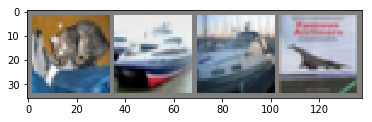

Ground Truth: 
cat ship ship plane


In [93]:

def imshow(torch_tensor):
    torch_tensor = torch_tensor/2 + 0.5
    npimg = torch_tensor.numpy()
    plt.imshow(npimg.transpose(1,2,0))
    plt.show()

    
tfs  = transforms.Compose([transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

root='/home/akulshr/cifar-10-batches-py/'

cifar_test = CIFARLoader(root, train=False, transform=tfs)
cifar_test_loader = data.DataLoader(cifar_test,batch_size=4, shuffle=False, num_workers=2)

# all possible classes in the CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

data_iter = iter(cifar_test_loader)
imgs,label = data_iter.next()

# Show the test images.
imshow(torchvision.utils.make_grid(imgs))

# Print the "Ground Truth labels" 
print("Ground Truth: ")
print(' '.join(classes[label[j]] for j in range(4)))








So we've got these images along with their labels as "ground truth". Now let's ask the neural network we just trained as to what it thinks the images are

In [9]:
##################################################
# If you're using GPUs for training, then care   #
# must be taken to use "cpu()" before getting any #                             
# data for printing, displaying etc.              #
# e.g
# _, pred = torch.max(op.cpu().data)              #
#                                                 #
#################################################
data_iter = iter(cifar_test_loader)
imgs,label = data_iter.next()
op = net(Variable(imgs))
_, pred = torch.max(op.data, 1)
print("Guessed class: ")
print(' '.join(classes[pred[j]] for j in range(4)))

NameError: name 'cifar_test_loader' is not defined

Pretty sweet! our neural network seems to have learnt something. Let's see how it does on the overall dataset:

In [100]:
correct = 0.0
total = 0.0
for cache in cifar_test_loader:
    img, label = cache 
    op = net(Variable(img))
    _, pred = torch.max(op.data, 1)
    total += label.size(0)
    correct += (pred==label).sum()


print("accuracy: %f"%(100*(correct/total)))

accuracy: 37.950000


Try out different combinations of neural network layers (limited to Linear, Softmax for now) and report on how the accuracy changes. Happy deep learning!